In [1]:
import warnings

warnings.filterwarnings(
    "ignore",
)
import os

os.environ["NIXTLA_ID_AS_COL"] = "true"
import numpy as np
import scipy

np.set_printoptions(suppress=True)
np.random.seed(1)
import random

random.seed(1)
from typing import Optional

import pandas as pd
from IPython.display import Image
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from statsforecast.arima import ARIMASummary, ndiffs, nsdiffs
from statsforecast.models import ARIMA, AutoARIMA, AutoETS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import kpss
from utilsforecast.losses import mae, rmse, smape

pd.set_option("max_colwidth", 100)
pd.set_option("display.precision", 3)
import seaborn as sns
from utilsforecast.plotting import plot_series as plot_series_utils

sns.set_style("whitegrid")
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams.update(
    {
        "figure.figsize": (8, 5),
        "figure.dpi": 100,
        "savefig.dpi": 300,
        "figure.constrained_layout.use": True,
        "axes.titlesize": 12,
        "axes.labelsize": 10,
        "xtick.labelsize": 9,
        "ytick.labelsize": 9,
        "legend.fontsize": 9,
        "legend.title_fontsize": 10,
    }
)

# Define a harmonious palette (8 colors)
ggplot_palette = [
    "#E24A33",  # orange-red
    "#348ABD",  # blue
    "#988ED5",  # purple
    "#777777",  # gray
    "#FBC15E",  # yellow
    "#8EBA42",  # green
    "#FFB5B8",  # pink
    "#17BECF",  # cyan
]

# Apply the palette globally
sns.set_palette(ggplot_palette)

from functools import partial

import matplotlib as mpl
from fpppy.utils import plot_series
from IPython.display import Image, Markdown, display
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsforecast import StatsForecast
from statsforecast.models import AutoETS
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from utilsforecast.evaluation import evaluate
from utilsforecast.feature_engineering import fourier, pipeline, trend
from utilsforecast.losses import mae
from utilsforecast.losses import mape
from utilsforecast.losses import mape as _mape
from utilsforecast.losses import mase, mqloss, quantile_loss, rmse


def mape(df, models, id_col="unique_id", target_col="y"):
    df_mape = _mape(df, models, id_col=id_col, target_col=target_col)
    df_mape.loc[:, df_mape.select_dtypes(include="number").columns] *= 100
    return df_mape


from fpppy.models import LinearRegression
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.preprocessing import SplineTransformer
from statsforecast import StatsForecast
from statsforecast.models import (
    HistoricAverage,
    Naive,
    RandomWalkWithDrift,
    SeasonalNaive,
    SklearnModel,
    WindowAverage,
)
from statsforecast.utils import ConformalIntervals

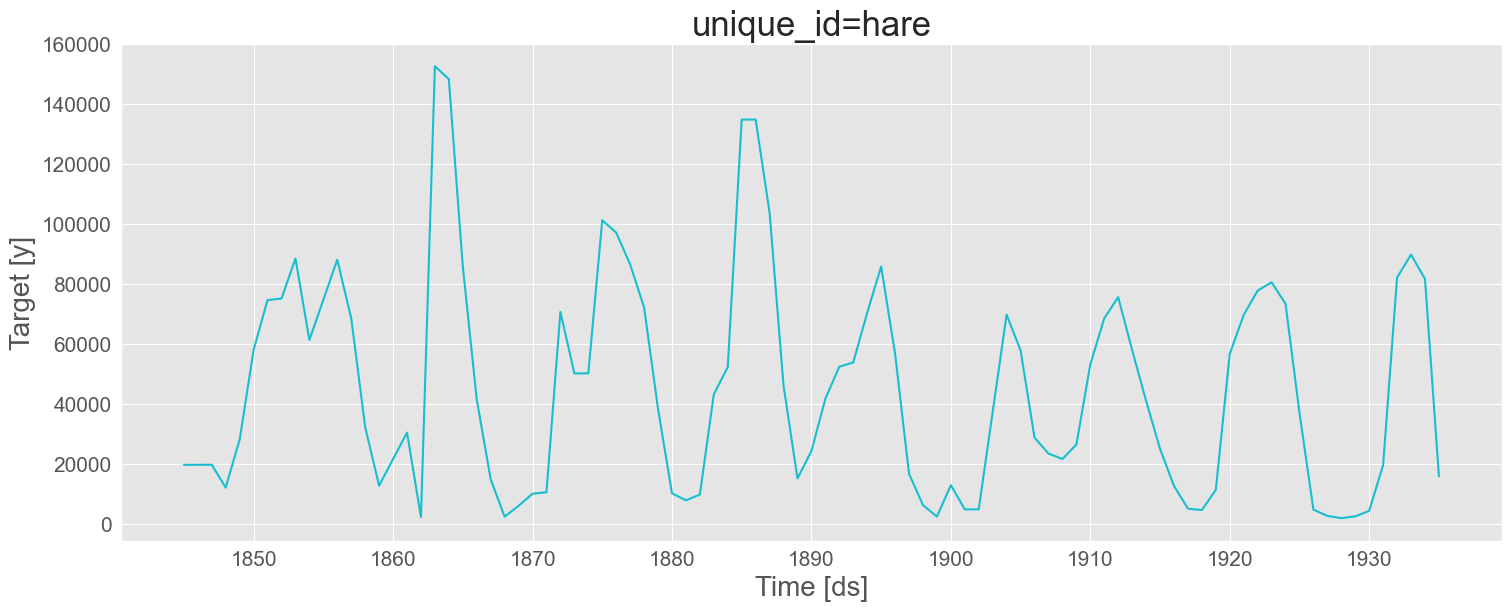

In [2]:
df = pd.read_csv("../DATA/pelt.csv")
df.ds = pd.to_datetime(df.ds)
df = df[df.unique_id == "hare"]
df = df.dropna().reset_index(drop=True)
plot_series(df)

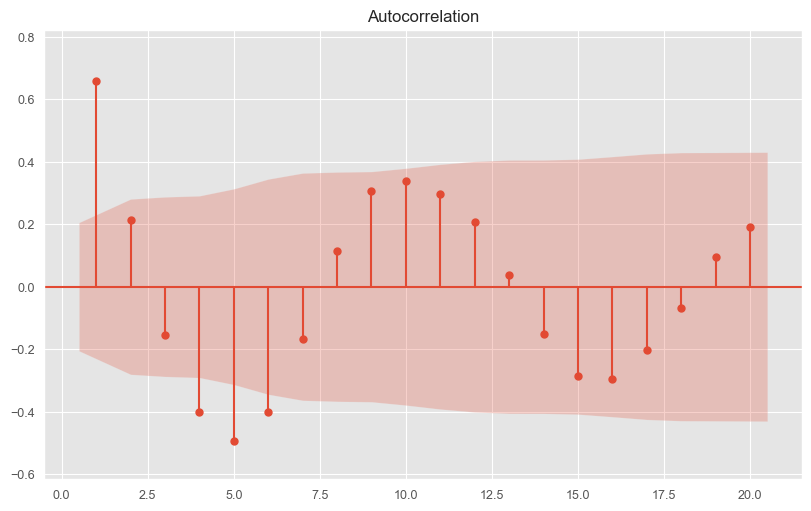

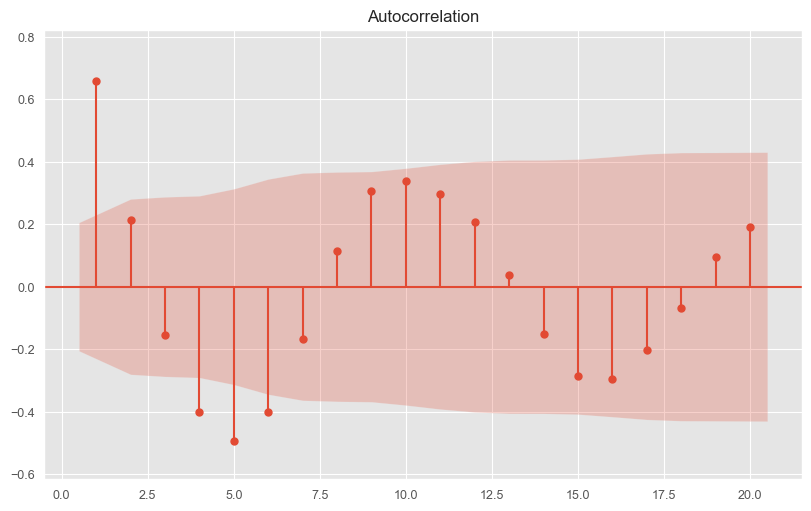

In [3]:
plot_acf(df.y, zero=False, auto_ylims=True)

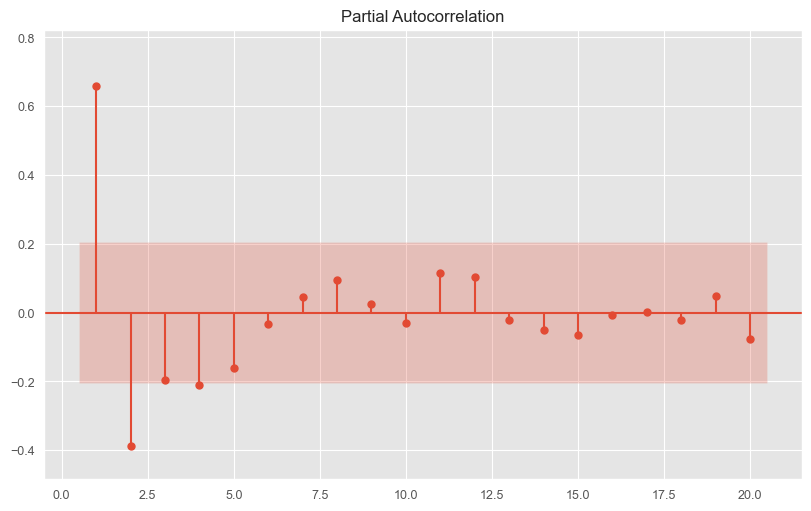

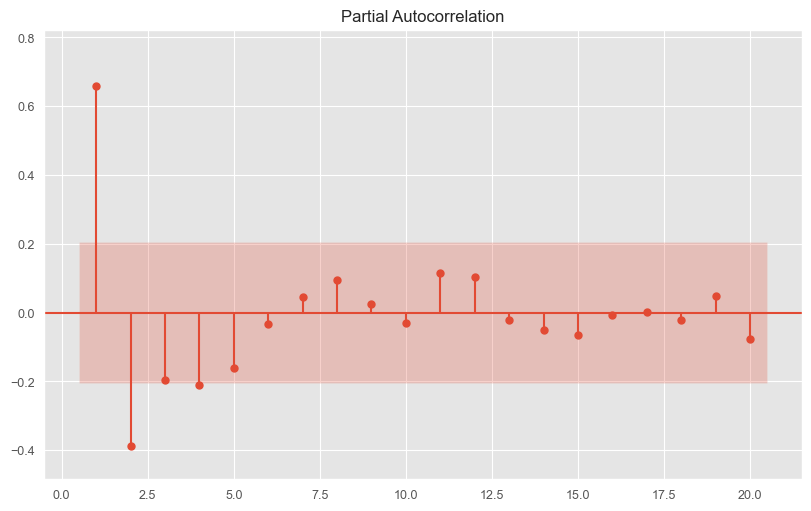

In [4]:
plot_pacf(df.y, zero=False, auto_ylims=True)

In [5]:
model = ARIMA(order=(4, 0, 0), include_constant=True).fit(df.y)

In [6]:
model.forecast(df.y, h=3)

{'mean': array([ 2066.09910504,  8249.58310616, 19420.21788128])}

In [7]:
model.model_

{'coef': {'ar1': 0.8219223657594391,
  'ar2': -0.2890597833116335,
  'ar3': -0.0057062734239975155,
  'ar4': -0.21652981879608965,
  'intercept': 44980.961133868885},
 'sigma2': 587643970.9907967,
 'var_coef': array([[      0.00938599,      -0.00827772,       0.00197734,
               0.00249549,      -6.12366558],
        [     -0.00827772,       0.01784821,      -0.01273316,
               0.003125  ,      -1.17753732],
        [      0.00197734,      -0.01273316,       0.01958399,
              -0.01017535,       4.64493421],
        [      0.00249549,       0.003125  ,      -0.01017535,
               0.01050669,      -5.9040727 ],
        [     -6.12366558,      -1.17753732,       4.64493421,
              -5.9040727 , 7492697.17643144]]),
 'mask': array([ True,  True,  True,  True,  True]),
 'loglik': -1045.9101402421957,
 'aic': 2103.8202804843913,
 'arma': (4, 0, 0, 0, 1, 0, 0),
 'residuals': array([-16489.40212348,  -7374.67059468, -11550.5037787 , -21483.12272396,
         -

In [8]:
df.tail()

,unique_id,ds,y
86,hare,1931-01-01,19520
87,hare,1932-01-01,82110
88,hare,1933-01-01,89760
89,hare,1934-01-01,81660
90,hare,1935-01-01,15760


In [12]:
model = AutoARIMA().fit(df.y)
model.forecast(df.y, h=10, level=[95])

{'mean': array([ 6644.87643743, 12897.33447578, 28022.32142722, 44459.96060187,
        56393.54458279, 61171.98752483, 59275.17694434, 53253.37892033,
        46287.11372913, 40953.30347931]),
 'lo-95': 0   -40690.502
 1   -47910.021
 2   -35688.635
 3   -19257.556
 4    -9020.352
 5    -7169.994
 6   -11100.164
 7   -17708.548
 8   -24677.505
 9   -30234.220
 Name: 95%, dtype: float64,
 'hi-95': 0     53980.255
 1     73704.690
 2     91733.278
 3    108177.478
 4    121807.441
 5    129513.969
 6    129650.517
 7    124215.306
 8    117251.732
 9    112140.827
 Name: 95%, dtype: float64}

In [ ]:
sns.lin